### Data:
- Data is provided in csv format in a file named <b>healthcare-dataset-stroke-data.csv</b>

### Column names and data types are as follow:
- id, integer.
- gender, string.
- age, double.
- hypertension, integer.
- heart_disease, integer.
- ever_married, string.
- work_type, string.
- Residence_type, string.
- avg_glucose_level, double.
- bmi, double.
- smoking_status, string.
- stroke, integer <b>(Target Label)</b>.
If the person has stroke the stroke label value is <b>"1"</b> otherwise <b>"0"</b>.

## To perform this task follow the following guiding steps:

### Create a spark session and import the required libraries

In [246]:
!pip install pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
from IPython.display import display, HTML
display(HTML("<style>pre { white-space: pre !important; }</style>"))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Create a data schema programatically

In [247]:
sampleDF = spark.read.csv('/content/healthcare-dataset-stroke-data.csv',inferSchema=True,samplingRatio=0.001,header=True)

In [248]:
sampleDF.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [249]:
myschema = sampleDF.schema
myschema

StructType([StructField('id', IntegerType(), True), StructField('gender', StringType(), True), StructField('age', DoubleType(), True), StructField('hypertension', IntegerType(), True), StructField('heart_disease', IntegerType(), True), StructField('ever_married', StringType(), True), StructField('work_type', StringType(), True), StructField('Residence_type', StringType(), True), StructField('avg_glucose_level', DoubleType(), True), StructField('bmi', DoubleType(), True), StructField('smoking_status', StringType(), True), StructField('stroke', IntegerType(), True)])

### Read the data using the standard DataReader (Key,Value) pairs format
- Provide the schema and any other required options.

In [250]:
df = spark.read.csv('/content/healthcare-dataset-stroke-data.csv',header=True,schema=myschema)

### Explore the data 
#### You have to do the following:
- Print the Schema.
- Show the first 10 rows from the data.
- Explore null values and show how many null values in each column.
- Plot a count plot for the target label and <b>notice the graph</b>.
- Perform any additional EDA you find useful.

In [251]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: string (nullable = true)
 |-- stroke: integer (nullable = true)



In [252]:
df.show(10,truncate=False)

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|id   |gender|age |hypertension|heart_disease|ever_married|work_type    |Residence_type|avg_glucose_level|bmi |smoking_status |stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|9046 |Male  |67.0|0           |1            |Yes         |Private      |Urban         |228.69           |36.6|formerly smoked|1     |
|51676|Female|61.0|0           |0            |Yes         |Self-employed|Rural         |202.21           |null|never smoked   |1     |
|31112|Male  |80.0|0           |1            |Yes         |Private      |Rural         |105.92           |32.5|never smoked   |1     |
|60182|Female|49.0|0           |0            |Yes         |Private      |Urban         |171.23           |34.4|smokes         |1     |
|1665 |Female|79.0|1           |0            |Yes      

In [253]:
import pyspark.sql.functions as fn
from pyspark.sql.functions import *

In [254]:
df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|201|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [255]:
new_df=df.toPandas()

In [256]:
new_df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


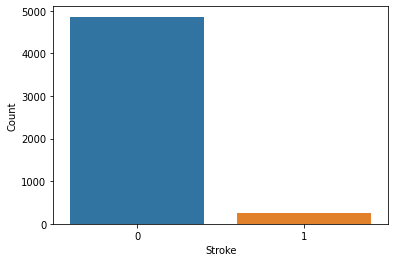

In [257]:
import seaborn as sns
ax = sns.barplot([0,1], y= [new_df["stroke"].value_counts()[0], new_df["stroke"].value_counts()[1]])
ax.set(xlabel="Stroke", ylabel = "Count");

### Get the summary statistics of the age column
- You will find the minimum age is about <b>0.08</b>.
- Remove rows for the age below <b>2 years old</b>.

In [258]:
df.select(['age']).summary().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|              5110|
|   mean|43.226614481409015|
| stddev| 22.61264672311348|
|    min|              0.08|
|    25%|              25.0|
|    50%|              45.0|
|    75%|              61.0|
|    max|              82.0|
+-------+------------------+



In [259]:
df2 = df.filter(df['age'] >= 2)

In [260]:
df2.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi| smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+---------------+------+
| 9046|  Male|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|formerly smoked|     1|
|51676|Female|61.0|           0|            0|         Yes|Self-employed|         Rural|           202.21|null|   never smoked|     1|
|31112|  Male|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|   never smoked|     1|
|60182|Female|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|         smokes|     1|
| 1665|Female|79.0|           1|            0|         

### Working with gender & smoking_status columns:
- Select and show the gender & smoking_status columns
- Get the distinct values for each column.

In [261]:
df2.select(['gender','smoking_status']).show()

+------+---------------+
|gender| smoking_status|
+------+---------------+
|  Male|formerly smoked|
|Female|   never smoked|
|  Male|   never smoked|
|Female|         smokes|
|Female|   never smoked|
|  Male|formerly smoked|
|  Male|   never smoked|
|Female|   never smoked|
|Female|        Unknown|
|Female|        Unknown|
|Female|   never smoked|
|Female|         smokes|
|Female|         smokes|
|  Male|        Unknown|
|Female|   never smoked|
|Female|   never smoked|
|  Male|         smokes|
|  Male|         smokes|
|Female|   never smoked|
|  Male|        Unknown|
+------+---------------+
only showing top 20 rows



In [262]:
df2.select('gender').distinct().show()

+------+
|gender|
+------+
|Female|
| Other|
|  Male|
+------+



In [263]:
df2.select('smoking_status').distinct().show()

+---------------+
| smoking_status|
+---------------+
|         smokes|
|        Unknown|
|   never smoked|
|formerly smoked|
+---------------+



#### Change the string values of the columns into numerical values as follow:
1. Gender column:
    * Male = 1 
    * Female = 0 
    * Other = 0 
2. Smoking Status column:
  * never smoked = 0
  * Unknown = 0.5
  * formerly smoked = 0.75
  * smokes = 1.0


In [264]:
df3 = df2.withColumn("gender", when(df2.gender == "Male",1) \
      .when(df2.gender == "Female",0) \
      .otherwise(0))

In [265]:
df3 =df3.withColumn("smoking_status", when(df3.smoking_status == 'never smoked', 0) \
      .when(df3.smoking_status == 'Unknown' , 0.5) \
      .when(df3.smoking_status == 'formerly smoked', 0.75)\
      .otherwise(1))

#### Show the output DataFrame
- Select and show the gender & smoking_status columns after value changing.
- Print schema for the new dataframe.

In [266]:
df3.select(['gender','smoking_status']).show()

+------+--------------+
|gender|smoking_status|
+------+--------------+
|     1|          0.75|
|     0|           0.0|
|     1|           0.0|
|     0|           1.0|
|     0|           0.0|
|     1|          0.75|
|     1|           0.0|
|     0|           0.0|
|     0|           0.5|
|     0|           0.5|
|     0|           0.0|
|     0|           1.0|
|     0|           1.0|
|     1|           0.5|
|     0|           0.0|
|     0|           0.0|
|     1|           1.0|
|     1|           1.0|
|     0|           0.0|
|     1|           0.5|
+------+--------------+
only showing top 20 rows



In [267]:
df3.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: integer (nullable = false)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = false)
 |-- stroke: integer (nullable = true)



### Deal with null value according to your data analysis.

In [268]:
df4=df3.dropna()

In [269]:
df4.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]
   ).show()

+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
| id|gender|age|hypertension|heart_disease|ever_married|work_type|Residence_type|avg_glucose_level|bmi|smoking_status|stroke|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+
|  0|     0|  0|           0|            0|           0|        0|             0|                0|  0|             0|     0|
+---+------+---+------------+-------------+------------+---------+--------------+-----------------+---+--------------+------+



In [270]:
df4.show()

+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
|   id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+-----+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 9046|     1|67.0|           0|            1|         Yes|      Private|         Urban|           228.69|36.6|          0.75|     1|
|31112|     1|80.0|           0|            1|         Yes|      Private|         Rural|           105.92|32.5|           0.0|     1|
|60182|     0|49.0|           0|            0|         Yes|      Private|         Urban|           171.23|34.4|           1.0|     1|
| 1665|     0|79.0|           1|            0|         Yes|Self-employed|         Rural|           174.12|24.0|           0.0|     1|
|56669|     1|81.0|           0|            0|         Yes|   

### Split the data into training and test dataframes:
- 80% training and 20% test.
- seed = 42.
- Save each dataframe as a parquet file

In [271]:
trainDF, testDF = df4.randomSplit([0.8, 0.2], seed=42)


In [272]:
trainDF.write.parquet("trainDF.parquet",  mode = 'overwrite')
testDF.write.parquet("testDF.parquet",  mode = 'overwrite')

### Read the saved Train and Test DataFrame:
- Use the dataframes you read in the subsequent steps.

In [273]:
trainDF = spark.read.parquet('trainDF.parquet')
testDF = spark.read.parquet('testDF.parquet')

In [274]:
trainDF.count()

3877

In [275]:
testDF.count()

918

### Create the model:
- Perform feature engineering steps.
- Create the logistic regression classifier.
- Build the pipeline model that uses all feature engineering steps and the model.
- Train the pipeline model using the trainig dataset.

In [276]:
trainDF.show()

+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| id|gender| age|hypertension|heart_disease|ever_married|    work_type|Residence_type|avg_glucose_level| bmi|smoking_status|stroke|
+---+------+----+------------+-------------+------------+-------------+--------------+-----------------+----+--------------+------+
| 77|     0|13.0|           0|            0|          No|     children|         Rural|            85.81|18.6|           0.5|     0|
| 84|     1|55.0|           0|            0|         Yes|      Private|         Urban|            89.17|31.5|           0.0|     0|
| 99|     0|31.0|           0|            0|          No|      Private|         Urban|           108.89|52.3|           0.5|     0|
|129|     0|24.0|           0|            0|          No|      Private|         Urban|            97.55|26.2|           0.0|     0|
|156|     0|33.0|           0|            0|         Yes|      Private|     

In [277]:
trainDF=trainDF.drop('id')
testDF=testDF.drop('id')


In [278]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression

In [279]:
trainDF.dtypes

[('gender', 'int'),
 ('age', 'double'),
 ('hypertension', 'int'),
 ('heart_disease', 'int'),
 ('ever_married', 'string'),
 ('work_type', 'string'),
 ('Residence_type', 'string'),
 ('avg_glucose_level', 'double'),
 ('bmi', 'double'),
 ('smoking_status', 'double'),
 ('stroke', 'int')]

In [280]:
lstDtypes = trainDF.dtypes

In [281]:
categoricalCols = [f for (f,d) in lstDtypes if d == 'string']
categoricalCols

['ever_married', 'work_type', 'Residence_type']

In [282]:
indexOutputCols = [f + "_Index" for f in categoricalCols]
indexOutputCols

['ever_married_Index', 'work_type_Index', 'Residence_type_Index']

In [283]:
oheOutputCols = [f + "_OHE" for f in categoricalCols]
oheOutputCols

['ever_married_OHE', 'work_type_OHE', 'Residence_type_OHE']

In [284]:
numericCols = [f for (f,d) in lstDtypes if ((d == 'double') or (d == 'int') & (f!='stroke'))]
numericCols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [285]:
assemblerInputs = oheOutputCols + numericCols
assemblerInputs

['ever_married_OHE',
 'work_type_OHE',
 'Residence_type_OHE',
 'gender',
 'age',
 'hypertension',
 'heart_disease',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [286]:
stringIndexer = StringIndexer(inputCols=categoricalCols,outputCols=indexOutputCols
                             ,handleInvalid='skip')

oheEncoder = OneHotEncoder(inputCols=indexOutputCols,outputCols=oheOutputCols)

vecAssembler = VectorAssembler(inputCols=assemblerInputs,outputCol='features')

In [287]:
lg = LogisticRegression(labelCol='stroke')

In [288]:
mystages=[stringIndexer,oheEncoder,vecAssembler,lg]

In [289]:
pl = Pipeline(stages=mystages)

In [290]:
pipelineModel= pl.fit(trainDF)

### Perform predictions on tests dataframe:
- Test the model using the test dataframe
- Select and show the feature column.
- Print the schema of the output dataframe.
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   

In [291]:
predDF = pipelineModel.transform(testDF)

In [292]:
predDF.printSchema()

root
 |-- gender: integer (nullable = true)
 |-- age: double (nullable = true)
 |-- hypertension: integer (nullable = true)
 |-- heart_disease: integer (nullable = true)
 |-- ever_married: string (nullable = true)
 |-- work_type: string (nullable = true)
 |-- Residence_type: string (nullable = true)
 |-- avg_glucose_level: double (nullable = true)
 |-- bmi: double (nullable = true)
 |-- smoking_status: double (nullable = true)
 |-- stroke: integer (nullable = true)
 |-- ever_married_Index: double (nullable = false)
 |-- work_type_Index: double (nullable = false)
 |-- Residence_type_Index: double (nullable = false)
 |-- ever_married_OHE: vector (nullable = true)
 |-- work_type_OHE: vector (nullable = true)
 |-- Residence_type_OHE: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nullable = false)



In [293]:
predDF.select('features').show(truncate=False)

+-----------------------------------------------------------+
|features                                                   |
+-----------------------------------------------------------+
|(13,[1,5,7,10,11],[1.0,1.0,42.0,98.53,18.5])               |
|(13,[1,7,10,11,12],[1.0,20.0,94.67,28.8,0.5])              |
|(13,[0,1,7,10,11,12],[1.0,1.0,43.0,88.23,37.6,0.5])        |
|(13,[0,1,5,6,7,10,11],[1.0,1.0,1.0,1.0,79.0,198.79,24.9])  |
|(13,[0,1,5,7,10,11,12],[1.0,1.0,1.0,58.0,105.74,26.8,0.75])|
|(13,[0,3,5,7,10,11,12],[1.0,1.0,1.0,37.0,72.09,24.1,1.0])  |
|(13,[4,7,10,11,12],[1.0,3.0,94.12,21.4,0.5])               |
|(13,[4,7,10,11,12],[1.0,14.0,92.22,22.8,0.5])              |
|(13,[3,7,10,11],[1.0,39.0,87.33,34.3])                     |
|(13,[4,7,10,11,12],[1.0,5.0,75.1,20.7,0.5])                |
|(13,[0,2,5,7,10,11,12],[1.0,1.0,1.0,74.0,68.18,27.3,0.75]) |
|(13,[1,7,10,11],[1.0,16.0,87.54,37.8])                     |
|(13,[0,1,5,6,7,10,11],[1.0,1.0,1.0,1.0,34.0,83.75,37.0])   |
|(13,[4,

In [294]:
predDF.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [295]:
predDF.select('features','prediction').show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|(13,[1,5,7,10,11]...|       0.0|
|(13,[1,7,10,11,12...|       0.0|
|(13,[0,1,7,10,11,...|       0.0|
|(13,[0,1,5,6,7,10...|       0.0|
|(13,[0,1,5,7,10,1...|       0.0|
|(13,[0,3,5,7,10,1...|       0.0|
|(13,[4,7,10,11,12...|       0.0|
|(13,[4,7,10,11,12...|       0.0|
|(13,[3,7,10,11],[...|       0.0|
|(13,[4,7,10,11,12...|       0.0|
|(13,[0,2,5,7,10,1...|       0.0|
|(13,[1,7,10,11],[...|       0.0|
|(13,[0,1,5,6,7,10...|       0.0|
|(13,[4,6,7,10,11,...|       0.0|
|(13,[1,5,7,10,11]...|       0.0|
|(13,[0,1,7,10,11,...|       0.0|
|(13,[0,1,7,10,11]...|       0.0|
|[1.0,0.0,1.0,0.0,...|       0.0|
|(13,[0,2,5,7,10,1...|       0.0|
|(13,[0,1,7,8,10,1...|       0.0|
+--------------------+----------+
only showing top 20 rows



In [296]:
predDF.select('stroke','prediction').filter(predDF['stroke'] == 1).show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
|     1|       0.0|
+------+----------+
only showing top 20 rows



In [297]:
predDF.filter(predDF['stroke'] == 0).count()

881

In [298]:
predDF.filter(predDF['prediction'] == 0).count()

918

In [299]:
predDF.filter(predDF['stroke'] == 1).count()

37

In [300]:
predDF.filter(predDF['prediction'] == 1).count()

0

### Evaluate the model performance
- Use <b>BinaryClassificationEvaluator</b>. This will calculate the <b>ROC</b>.
- Set the parameters as follow:
    - <b>rawPredictionCol='prediction'</b> and <b>labelCol='stroke'</b>

In [301]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [302]:
evaluatorROC = BinaryClassificationEvaluator(rawPredictionCol='prediction'
                                             ,labelCol='stroke')

In [303]:
evaluatorROC.evaluate(predDF)

0.5

### Improve Model Performance
- You may noticed that <b>the target label is imbalanced</b>.
- LogisticRegression classifier has a special parameter <b>weightCol</b> to deal with imbalanced class.
- In order to use this parameter you must have a <b>weightCol</b> in your training dataframe.
- In order to create this column you will need to define a <b>UDF</b> and apply it to the target label column.
- Create a LogisticRegression classifier with <b>weightCol</b> parameter.
- Build and train a pipeline model with the new LogisticRegression.
- Perform the prediction on the test dataframe. 
- Select and show both prediction and label columns.
- Explore the results for the label column stroke=1. i.e. select both columns (prediction,stroke) for stroke=1.<b>notice the result.</b> 
- Count the predicted 1 and 0 values.<b>notice the result.</b>   
- Evaluate the model performance exactly as in the previous step.
### YOU SHOULD OBTAIN  ROC > 0.65
<BR>
<b><font color='red'>Note: feel free to deal with the imbalanced cluster with the above method or another. However, you can only use methods applied on SPARK DATAFRAME</font></b>

In [304]:
# from pyspark.sql.types import DoubleType
# @udf(returnType=DoubleType()) 
# def weightCol(num):
#   diff = trainDF.filter(trainDF['stroke'] == 0)\
#         .count() / trainDF.count()
#   OneWeight = 1 - diff
#   ZeroWeight = diff
#   if num==0 :
#         return OneWeight
#   else: 
#         return ZeroWeight

In [305]:
# trainDF3 = trainDF.withColumn("weightCol",weightCol(trainDF['stroke']))

In [306]:
diff = trainDF.filter(trainDF['stroke'] == 0)\
        .count() / trainDF.count()
OneWeight = 1 - diff
ZeroWeight = diff


In [307]:
trainDF2 = trainDF.withColumn("weightCol", when(trainDF.stroke == 0, OneWeight).when(trainDF.stroke == 1, ZeroWeight))

In [308]:
trainDF2.select('stroke','weightCol').show()

+------+-------------------+
|stroke|          weightCol|
+------+-------------------+
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     1| 0.9556358008769668|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
|     0|0.04436419912303324|
+------+-------------------+
only showing top 20 rows



In [309]:
lgNew = LogisticRegression(labelCol='stroke', weightCol='weightCol')

In [310]:
mystages2=[stringIndexer,oheEncoder,vecAssembler,lgNew]

In [311]:
pl2 = Pipeline(stages=mystages2)

In [312]:
pipelineModel= pl2.fit(trainDF2)

In [313]:
predDF2 = pipelineModel.transform(testDF)

In [314]:
predDF2.select('stroke','prediction').show()

+------+----------+
|stroke|prediction|
+------+----------+
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
|     0|       0.0|
|     0|       0.0|
|     0|       0.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [315]:
predDF2.select('features','prediction').show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|(13,[1,5,7,10,11]...|       0.0|
|(13,[1,7,10,11,12...|       0.0|
|(13,[0,1,7,10,11,...|       0.0|
|(13,[0,1,5,6,7,10...|       1.0|
|(13,[0,1,5,7,10,1...|       1.0|
|(13,[0,3,5,7,10,1...|       0.0|
|(13,[4,7,10,11,12...|       0.0|
|(13,[4,7,10,11,12...|       0.0|
|(13,[3,7,10,11],[...|       0.0|
|(13,[4,7,10,11,12...|       0.0|
|(13,[0,2,5,7,10,1...|       1.0|
|(13,[1,7,10,11],[...|       0.0|
|(13,[0,1,5,6,7,10...|       0.0|
|(13,[4,6,7,10,11,...|       0.0|
|(13,[1,5,7,10,11]...|       0.0|
|(13,[0,1,7,10,11,...|       1.0|
|(13,[0,1,7,10,11]...|       0.0|
|[1.0,0.0,1.0,0.0,...|       0.0|
|(13,[0,2,5,7,10,1...|       0.0|
|(13,[0,1,7,8,10,1...|       1.0|
+--------------------+----------+
only showing top 20 rows



In [316]:
predDF2.select('stroke','prediction').filter(predDF2['stroke'] == 1).show()

+------+----------+
|stroke|prediction|
+------+----------+
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
|     1|       1.0|
+------+----------+
only showing top 20 rows



In [317]:
predDF2.filter(predDF2['stroke'] == 0).count()

881

In [318]:
predDF2.filter(predDF2['prediction'] == 0).count()

647

In [319]:
predDF2.filter(predDF2['stroke'] == 1).count()

37

In [320]:
predDF2.filter(predDF2['prediction'] == 1).count()

271

In [321]:
evaluatorROC.evaluate(predDF2)

0.8249532165536706